### This will be the Bob Ross Code!!!

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### KNN Bob Ross Gallery Creator

In [4]:
# read in the Bob Ross CSV

br = pd.read_csv('elements-by-episode.csv')
br.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Initial Data Analysis

In [34]:
# See which elements are the most common
element_counts = []
elements = []
for col in br.columns.values[2:]:
    elements.append(col)
    element_counts.append(sum(br[col]))

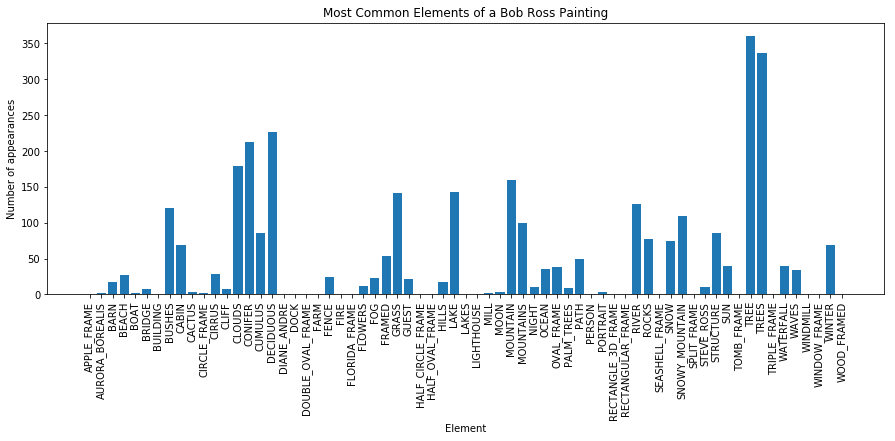

In [41]:
# Graph the most common items
fig = plt.figure(figsize=(15, 5))

y_pos = np.arange(len(br.columns.values[2:]))
ax = plt.subplot(111, xlabel='Element', ylabel='Number of appearances', title='Most Common Elements of a Bob Ross Painting')
plt.xticks(y_pos, elements, rotation=90)
ax.bar(y_pos, element_counts)

plt.show()

The 5 most common Bob Ross Painting elements are Trees (background), Tree (foreground), Deciduous, Conifer, and Clouds. Use these to make the quintessential Bob Ross painting.

In [9]:
# define a variable containing only the boolean data
data = br[br.columns.values[2:]]

In [10]:
def createGallery(name, n):
    name = name.upper()
    
    # Find the index of the desired painting
    i = 0
    index = 0
    for title in br['TITLE']:
        if name == title:
            index = i
        i += 1
        
    # Create the KNN Model

    # Use the Guest column as the target, since it isn't an element of the painting
    target = br['GUEST']
    data = br[br.columns.values[2:]]

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(data, target)
    
    # Find the k nearest neighbors
    test = br.iloc[index, :]
    neighbors = neigh.kneighbors(test[2:], n_neighbors=n, return_distance=False)
    
    # Print out the names of the nearest neighbors
    for neighbor in neighbors:
        print(br.iloc[neighbor, 0:2])

In [11]:
# Test CreateGallery
createGallery('EBONY SUNSET', 10)
createGallery('QUIET STREAM', 5)

    EPISODE                  TITLE
0    S01E01  "A WALK IN THE WOODS"
69   S06E05      "SECLUDED FOREST"
161  S13E06         "HIDDEN CREEK"
22   S02E10           "LAZY RIVER"
370  S29E07        "CYPRESS CREEK"
142  S11E13       "HAPPY ACCIDENT"
278  S22E06          "PURPLE HAZE"
18   S02E06          "BLACK RIVER"
17   S02E05      "AUTUMN SPLENDOR"
58   S05E07       "BUBBLING BROOK"
    EPISODE                  TITLE
0    S01E01  "A WALK IN THE WOODS"
161  S13E06         "HIDDEN CREEK"
69   S06E05      "SECLUDED FOREST"
22   S02E10           "LAZY RIVER"
142  S11E13       "HAPPY ACCIDENT"


/Users/Sabrina/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Sabrina/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Clustering

In [12]:
print(br.columns.values)

['EPISODE' 'TITLE' 'APPLE_FRAME' 'AURORA_BOREALIS' 'BARN' 'BEACH' 'BOAT'
 'BRIDGE' 'BUILDING' 'BUSHES' 'CABIN' 'CACTUS' 'CIRCLE_FRAME' 'CIRRUS'
 'CLIFF' 'CLOUDS' 'CONIFER' 'CUMULUS' 'DECIDUOUS' 'DIANE_ANDRE' 'DOCK'
 'DOUBLE_OVAL_FRAME' 'FARM' 'FENCE' 'FIRE' 'FLORIDA_FRAME' 'FLOWERS' 'FOG'
 'FRAMED' 'GRASS' 'GUEST' 'HALF_CIRCLE_FRAME' 'HALF_OVAL_FRAME' 'HILLS'
 'LAKE' 'LAKES' 'LIGHTHOUSE' 'MILL' 'MOON' 'MOUNTAIN' 'MOUNTAINS' 'NIGHT'
 'OCEAN' 'OVAL_FRAME' 'PALM_TREES' 'PATH' 'PERSON' 'PORTRAIT'
 'RECTANGLE_3D_FRAME' 'RECTANGULAR_FRAME' 'RIVER' 'ROCKS' 'SEASHELL_FRAME'
 'SNOW' 'SNOWY_MOUNTAIN' 'SPLIT_FRAME' 'STEVE_ROSS' 'STRUCTURE' 'SUN'
 'TOMB_FRAME' 'TREE' 'TREES' 'TRIPLE_FRAME' 'WATERFALL' 'WAVES' 'WINDMILL'
 'WINDOW_FRAME' 'WINTER' 'WOOD_FRAMED']


In [22]:
# Create hierarchical clusters to sort the paintings

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2,

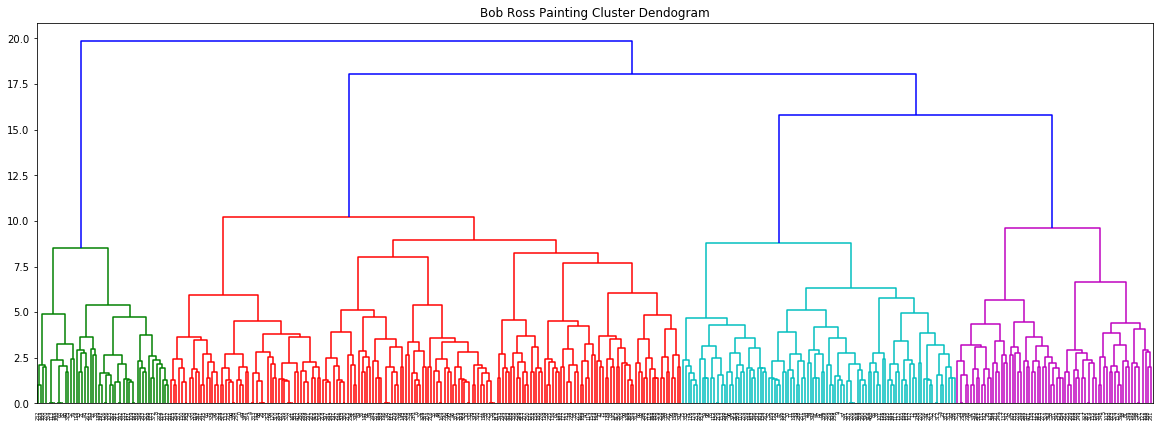

In [29]:
# Show the dedrogram that displays cluster choices (small version)
# https://www.displayr.com/what-is-dendrogram/
plt.figure(figsize=(20, 7))  
plt.title("Bob Ross Painting Cluster Dendogram")
plt.xticks(np.arange(len(br['TITLE'])), br['TITLE'])
dend = shc.dendrogram(shc.linkage(data, method='ward'))

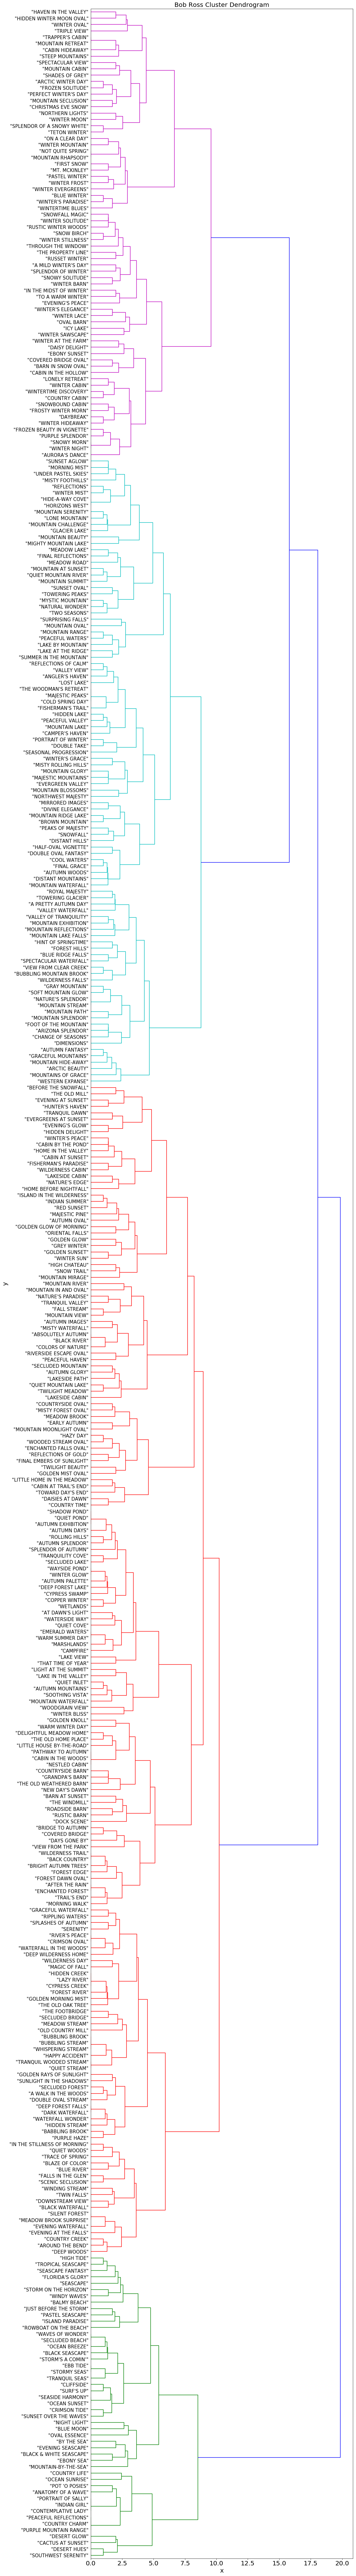

In [30]:
# Show the dedrogram that displays cluster choices (large version)
fig = plt.figure(figsize=(15, 150))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='Bob Ross Cluster Dendrogram')
plt.yticks(np.arange(len(br['TITLE'])), br['TITLE'])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
            ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
dend = shc.dendrogram(shc.linkage(data, method='ward'), orientation='right', leaf_font_size=15, labels=list(br['TITLE']))  